In [4]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [50]:
cd /content/drive/MyDrive/Knee-project

/content/drive/MyDrive/Knee-project


# Dataset Link:
https://data.mendeley.com/datasets/t9ndx37v5h/1

## for more project and Data sceince materials folow our blog link below:

# http://buffml.com/

# Youtube channel:

# https://www.youtube.com/c/artificialintelligencehub

In [5]:
%tensorflow_version 1.x

UsageError: Line magic function `%tensorflow_version` not found.


In [9]:
import tensorflow
print(tensorflow.__version__)

2.11.0


#Data Preprocessing

In [11]:
import cv2,os
data_path='C:\\Users\\zeesh\\OneDrive\\Documents\\Projects\\Mini_Project B-Tech\\XRayImages\\Knee X-ray Images'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'MedicalExpert-I': 0, 'MedicalExpert-II': 1}
['MedicalExpert-I', 'MedicalExpert-II']
[0, 1]


In [13]:
img_size=256
data=[]
label=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the image  into 256 x 256, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            label.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

Exception: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_sr

# Recale and assign  catagorical labels

In [14]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
label=np.array(label)
from keras.utils import np_utils
new_label=np_utils.to_categorical(label)

ValueError: zero-size array to reduction operation maximum which has no identity

In [56]:
new_label.shape

(1650, 5)

#CNN Model

In [57]:
data.shape

(1650, 256, 256, 1)

In [58]:
data.shape[1:]

(256, 256, 1)

In [15]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(128,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The thrid convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from 3rd convolution layer
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
#Dense layer of 128 neurons

model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons

model.add(Dense(5,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 254, 254, 128)     1280      
_________________________________________________________________
activation_8 (Activation)    (None, 254, 254, 128)     0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 127, 127, 128)     0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 125, 125, 64)      73792     
_________________________________________________________________
activation_9 (Activation)    (None, 125, 125, 64)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 60, 60, 32)       

# Splitting data into traning and testing

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.1)

ModuleNotFoundError: No module named 'sklearn'

NameError: name 'x_test' is not defined

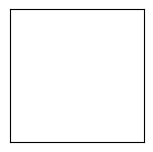

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()

In [63]:
history=model.fit(x_train,y_train,epochs=100,validation_split=0.2)

Train on 1188 samples, validate on 297 samples
Epoch 1/100
1188/1188 [==============================] - 9s 7ms/step - loss: 1.5608 - accuracy: 0.2946 - val_loss: 1.5428 - val_accuracy: 0.3098
Epoch 2/100
1188/1188 [==============================] - 6s 5ms/step - loss: 1.5207 - accuracy: 0.3249 - val_loss: 1.5139 - val_accuracy: 0.3367
Epoch 3/100
1188/1188 [==============================] - 6s 5ms/step - loss: 1.4740 - accuracy: 0.3308 - val_loss: 1.4718 - val_accuracy: 0.3636
Epoch 4/100
1188/1188 [==============================] - 6s 5ms/step - loss: 1.4104 - accuracy: 0.3847 - val_loss: 1.4495 - val_accuracy: 0.3636
Epoch 5/100
1188/1188 [==============================] - 6s 5ms/step - loss: 1.3896 - accuracy: 0.3847 - val_loss: 1.4323 - val_accuracy: 0.4040
Epoch 6/100
1188/1188 [==============================] - 6s 5ms/step - loss: 1.3586 - accuracy: 0.4167 - val_loss: 1.4131 - val_accuracy: 0.3805
Epoch 7/100
1188/1188 [==============================] - 6s 5ms/step - loss: 1.3153

In [64]:
model.save('model.h5')

In [65]:
from matplotlib import pyplot as plt

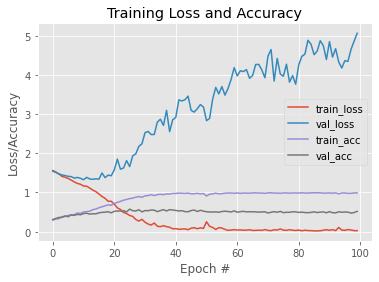

In [66]:
# plot the training loss and accuracy
N = 100 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")

In [67]:
vaL_loss, val_accuracy= model.evaluate(x_test, y_test, verbose=0)
print("test loss:", vaL_loss,'%')
print("test accuracy:", val_accuracy,"%")

test loss: 5.4802391427935975 %
test accuracy: 0.4909090995788574 %


A.I predicts: Moderate
Correct prediction for label 3 is Moderate


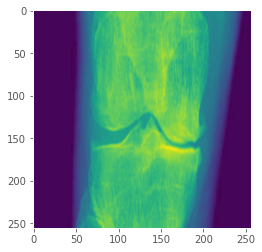

In [68]:
X = 32

img_size = 256

img_single = x_test[X]
img_single = cv2.resize(img_single, (img_size, img_size))
img_single = (np.expand_dims(img_single, 0))
img_single = img_single.reshape(img_single.shape[0],256,256,1)

predictions_single = model.predict(img_single)
print('A.I predicts:',categories[np.argmax(predictions_single)])
print("Correct prediction for label",np.argmax(y_test[X]),'is',categories[np.argmax(y_test[X])])
plt.imshow(np.squeeze(img_single))
plt.grid(False)
plt.show()

<Figure size 432x288 with 0 Axes>

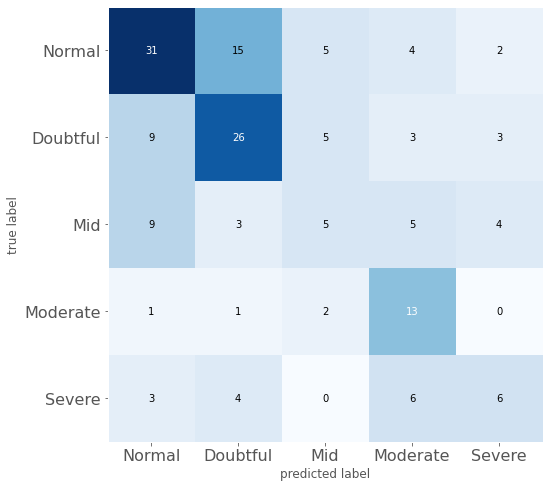

In [69]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

test_labels = np.argmax(y_test, axis=1)
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)


cm  = confusion_matrix(test_labels, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(5), ['Normal','Doubtful','Mid','Moderate','Severe'], fontsize=16)
plt.yticks(range(5), ['Normal','Doubtful','Mid','Moderate','Severe'], fontsize=16)
plt.show()

# My GitHub Profile Link:

# https://github.com/noumannahmad